In [1]:
# import importing_tools

# data_train= {}
# data_test = {}

# data_train['X'],data_train['y'],data_test['X'],data_test['y'] = importing_tools.import_and_split()

# import numpy as np

# np.save('training_data',data_train)
# np.save('test_data',data_test)

In [2]:
import numpy as np
import tensorflow as tf
import importing_tools

train_steps = 10000
learning_rate = 1e-4
ch_used = 25      # 25 / 22
model = 'cnn'     # cnn / rnn / birnn
subj_used = 'all' # all / one

model_dir = "SavedModels/{}_train_{}_{}".format(model,subj_used,ch_used)

#####################################################

data = np.load('training_data.npy').item()

if subj_used != 'all':
    data['X'] = [data['X'][subj_used]]
    data['y'] = [data['y'][subj_used]]
    

data['X'] = [data['X'][i][:,:ch_used,:] for i in range(len(data['X']))]
data['X'] = [X.reshape([*X.shape,1]) for X in data['X']]

train_x, train_y, val_x, val_y = importing_tools.partition_train_val(data['X'],data['y'],0.2)

train_x = np.vstack(train_x)
train_y = np.hstack(train_y)


#Preprocessing
x_mean = train_x.mean(axis=0)
x_std = np.sqrt(train_x.var(axis=0))

train_x -= x_mean
train_x /= x_std

val_x = [(X-x_mean)/x_std for X in val_x]

val_x_all = np.vstack(val_x)
val_y_all = np.hstack(val_y)

print(train_x.shape)
print(train_y.shape)
print(val_x_all.shape)
print(val_y_all.shape)
print(model_dir)

(1687, 25, 1000, 1)
(1687,)
(421, 25, 1000, 1)
(421,)
SavedModels/cnn_train_all_25


In [3]:
from build_estimators import BuildEstimator

eeg_classifier = BuildEstimator(ch_used,model,subj_used,model_dir,learning_rate)

INFO:tensorflow:Using config: {'_model_dir': 'SavedModels/cnn_train_all_25', '_tf_random_seed': None, '_save_summary_steps': 1, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f9bdb4202e8>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [4]:
# tensors_to_log = {"Loss": "Loss_value"}
# logging_hook = tf.train.LoggingTensorHook(
#   tensors=tensors_to_log, every_n_iter=1)

# Train the model
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": train_x},
    y=train_y,
    batch_size=50,
    num_epochs=None,
    shuffle=True)

eeg_classifier.train(input_fn=train_input_fn, steps=train_steps)

# # Validate the model
# val_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x": val_x_all}, y=val_y_all,shuffle=False)

# avg_eval_results = eeg_classifier.evaluate(input_fn=val_input_fn)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into SavedModels/cnn_train_all_25/model.ckpt.
INFO:tensorflow:loss = 8.91798, step = 1
INFO:tensorflow:global_step/sec: 25.7274
INFO:tensorflow:loss = 4.23293, step = 101 (3.888 sec)
INFO:tensorflow:global_step/sec: 26.8959
INFO:tensorflow:loss = 3.07191, step = 201 (3.718 sec)
INFO:tensorflow:global_step/sec: 27.477
INFO:tensorflow:loss = 2.4473, step = 301 (3.639 sec)
INFO:tensorflow:global_step/sec: 27.614
INFO:tensorflow:loss = 2.12283, step = 401 (3.622 sec)
INFO:tensorflow:global_step/sec: 27.5037
INFO:tensorflow:loss = 1.87721, step = 501 (3.635 sec)
INFO:tensorflow:global_step/sec: 27.5092
INFO:tensorflow:loss = 1.67299, step = 601 (3.635 sec)
INFO:tensorflow:global_step/sec: 27.4561
INFO:tensorflow:loss = 1.50009, step = 701 (3.643 sec)
INFO:tensorflow:global_step/sec: 27.5583
INFO:tensorflow:loss = 1.34102, step = 801 (3.627 sec)
INFO:tensorflow:global_step/sec: 27.5211
INFO:tensorflow:loss =

INFO:tensorflow:loss = 0.365551, step = 8301 (3.625 sec)
INFO:tensorflow:global_step/sec: 27.7984
INFO:tensorflow:loss = 0.276381, step = 8401 (3.597 sec)
INFO:tensorflow:global_step/sec: 27.723
INFO:tensorflow:loss = 0.294512, step = 8501 (3.607 sec)
INFO:tensorflow:global_step/sec: 27.8162
INFO:tensorflow:loss = 0.316412, step = 8601 (3.595 sec)
INFO:tensorflow:global_step/sec: 27.6476
INFO:tensorflow:loss = 0.286305, step = 8701 (3.617 sec)
INFO:tensorflow:global_step/sec: 27.7043
INFO:tensorflow:loss = 0.318934, step = 8801 (3.611 sec)
INFO:tensorflow:global_step/sec: 27.8005
INFO:tensorflow:loss = 0.29827, step = 8901 (3.595 sec)
INFO:tensorflow:global_step/sec: 27.8165
INFO:tensorflow:loss = 0.296794, step = 9001 (3.595 sec)
INFO:tensorflow:global_step/sec: 27.8381
INFO:tensorflow:loss = 0.29948, step = 9101 (3.592 sec)
INFO:tensorflow:global_step/sec: 27.8025
INFO:tensorflow:loss = 0.279727, step = 9201 (3.597 sec)
INFO:tensorflow:global_step/sec: 27.6923
INFO:tensorflow:loss = 

In [5]:
data = np.load('test_data.npy').item()

if subj_used != 'all':
    data['X'] = [data['X'][subj_used]]
    data['y'] = [data['y'][subj_used]]

data['X'] = [data['X'][i][:,:ch_used,:] for i in range(len(data['X']))]
data['X'] = [X.reshape([*X.shape,1]) for X in data['X']]

test_x = [(X-x_mean)/x_std for X in data['X']]
test_y = data['y']


from build_estimators import IndividualEvaluation

avg_val_acc, val_acc, val_eval_results = IndividualEvaluation(eeg_classifier,val_x,val_y)
avg_test_acc, test_acc, test_eval_results = IndividualEvaluation(eeg_classifier,test_x,test_y)

INFO:tensorflow:Starting evaluation at 2018-03-19-02:36:10
INFO:tensorflow:Restoring parameters from SavedModels/cnn_train_all_25/model.ckpt-10000
INFO:tensorflow:Finished evaluation at 2018-03-19-02:36:10
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.510638, global_step = 10000, loss = 2.09789
INFO:tensorflow:Starting evaluation at 2018-03-19-02:36:10
INFO:tensorflow:Restoring parameters from SavedModels/cnn_train_all_25/model.ckpt-10000
INFO:tensorflow:Finished evaluation at 2018-03-19-02:36:10
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.638298, global_step = 10000, loss = 1.35509
INFO:tensorflow:Starting evaluation at 2018-03-19-02:36:11
INFO:tensorflow:Restoring parameters from SavedModels/cnn_train_all_25/model.ckpt-10000
INFO:tensorflow:Finished evaluation at 2018-03-19-02:36:11
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.574468, global_step = 10000, loss = 1.72961
INFO:tensorflow:Starting evaluation at 2018-03-19-02:36:11

In [6]:
print(avg_val_acc,avg_test_acc)

0.691211 0.646667


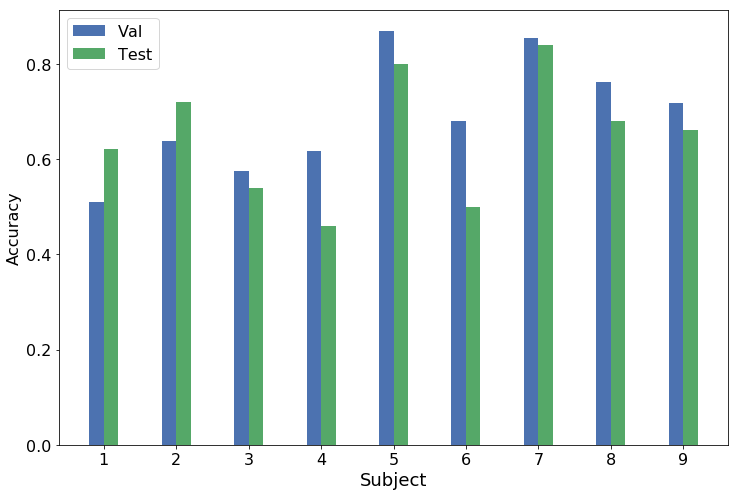

In [7]:
import matplotlib.pyplot as plt

if subj_used == 'all':
    subj = np.arange(1,10)

    plt.style.use('seaborn-deep')
    plt.rcParams['figure.figsize'] = (12.0, 8.0) # set default size of plots
    plt.rcParams['image.interpolation'] = 'nearest'
    plt.rcParams['image.cmap'] = 'gray'
    plt.xlabel('Subject', fontsize=18)
    plt.ylabel('Accuracy', fontsize=16)

    plt.bar(subj-0.1,val_acc,width=0.2,align='center',label='Val')
    plt.bar(subj+0.1,test_acc,width=0.2,align='center',label='Test')
    plt.xticks(np.arange(1,10),fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(loc='upper left',fontsize=16)
    plt.show()